In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
import seaborn as sns
from keras.datasets import mnist
from keras import models
from keras.utils import to_categorical
import cv2
import copy
from skimage.transform import resize
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


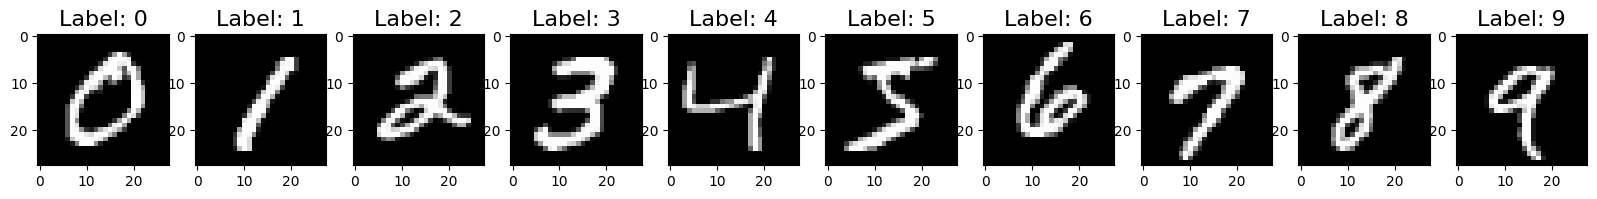

In [13]:
numberOFclasses = 10
f, ax = plt.subplots(1, numberOFclasses, figsize=(20,20))

for i in range(0, numberOFclasses):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Label: {}".format(i), fontsize=16)

In [14]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, numberOFclasses)
y_test = keras.utils.to_categorical(y_test, numberOFclasses)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [60]:
x_test[0].shape

(28, 28, 1)

In [39]:
model = keras.Sequential(
    [
      keras.layers.Conv2D(32,(3,3), activation='relu',padding='same', input_shape = (28,28,1)),
      keras.layers.Conv2D(32,(3,3), activation='relu'),
      keras.layers.MaxPooling2D((2,2)),
      keras.layers.Conv2D(64,(3,3), activation='relu'),
      keras.layers.MaxPooling2D((2,2)),
      keras.layers.Conv2D(64,(3,3), activation='relu'),
      keras.layers.Flatten(),
      #keras.layers.Dense(64,activation = 'relu'),
      keras.layers.Dense(10, activation= 'softmax')
    ]
)

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)         

In [40]:
sgd=keras.optimizers.SGD(clipvalue=1.0)
adam=keras.optimizers.Adam(learning_rate=0.01)

model_checkpoint_callback = keras.callbacks.ModelCheckpoint("digits.h5",monitor='val_accuracy',save_best_only=True)
EarlyStopping1=keras.callbacks.EarlyStopping( monitor="val_accuracy",patience=5,restore_best_weights=True)
model.compile(optimizer = adam,loss ='categorical_crossentropy',metrics = ['accuracy'])

In [41]:
history=model.fit(x_train,y_train, epochs=30, batch_size = 64,validation_split=0.1,callbacks=[model_checkpoint_callback,EarlyStopping1])

Epoch 1/30
844/844 [==============================] - 7s 7ms/step - loss: 0.1761 - accuracy: 0.9441 - val_loss: 0.0776 - val_accuracy: 0.9755
Epoch 2/30
844/844 [==============================] - 6s 7ms/step - loss: 0.0710 - accuracy: 0.9781 - val_loss: 0.0526 - val_accuracy: 0.9838
Epoch 3/30
844/844 [==============================] - 6s 7ms/step - loss: 0.0644 - accuracy: 0.9806 - val_loss: 0.0623 - val_accuracy: 0.9840
Epoch 4/30
844/844 [==============================] - 6s 7ms/step - loss: 0.0647 - accuracy: 0.9804 - val_loss: 0.0508 - val_accuracy: 0.9855
Epoch 5/30
844/844 [==============================] - 6s 7ms/step - loss: 0.0547 - accuracy: 0.9834 - val_loss: 0.0537 - val_accuracy: 0.9842
Epoch 6/30
844/844 [==============================] - 6s 7ms/step - loss: 0.0554 - accuracy: 0.9832 - val_loss: 0.0757 - val_accuracy: 0.9790
Epoch 7/30
844/844 [==============================] - 6s 7ms/step - loss: 0.0545 - accuracy: 0.9835 - val_loss: 0.0695 - val_accuracy: 0.9832
Epoch 

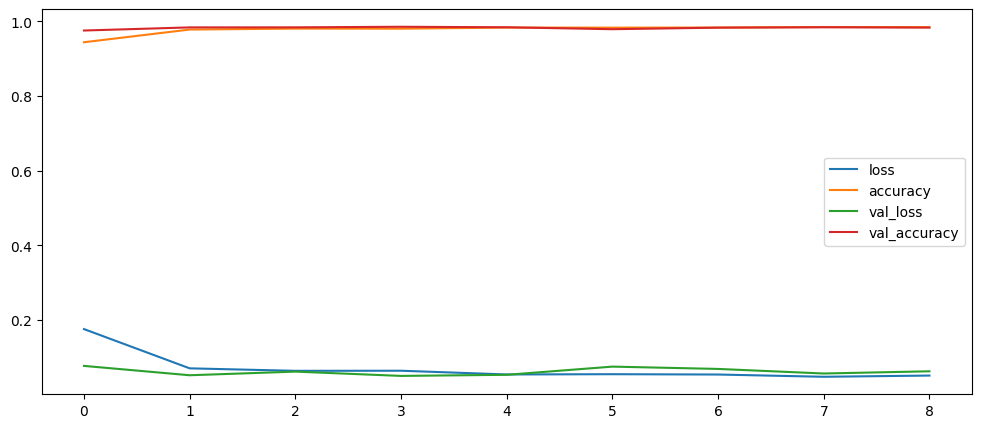

In [42]:
fig,ax = plt.subplots(figsize=(12,5))
ax=plt.plot(history.history["loss"],label="loss")
ax=plt.plot(history.history["accuracy"],label="accuracy")
ax=plt.plot(history.history["val_loss"],label="val_loss")
ax=plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.legend()

In [43]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: {},Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.0520 - accuracy: 0.9834
Test Loss: 0.0519833080470562, Test Accuracy: 0.9833999872207642


In [44]:
#model1=keras.models.load_model("digits.h5")

In [45]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

313/313 [==============================] - 1s 3ms/step
[7 2 1 ... 4 5 6]


In [39]:
x_test.shape

(10000, 28, 28, 1)

9858


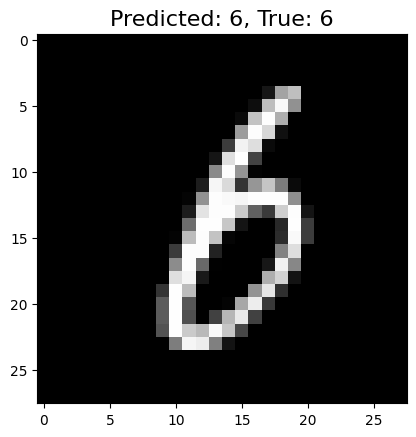

In [54]:
random_idx = np.random.choice(len(x_test))
print(random_idx)
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

(28, 28, 1)


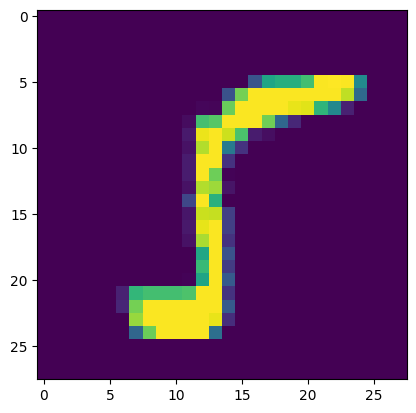

In [41]:
print(x_test[9830].shape)
plt.imshow(x_test[9830])

In [2]:
model1=keras.models.load_model("digits.h5")

1/1 [==============================] - 0s 19ms/step
[5]


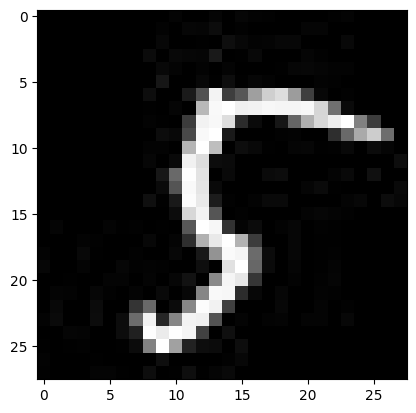

In [5]:
img3_1=load_img('D:\\A.my documents\\A.opencv\\A.Python\\MNIST\\sample\\779.jpg', grayscale=True, target_size=(28, 28))
img3=copy.copy(img3_1)

img = img_to_array(img3)

img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')
img = img / 255.0


y_pred1 = model1.predict(img)
y_pred1 = np.argmax(y_pred1, axis=1)
print(y_pred1)
plt.imshow(img3_1, cmap='gray')